In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Layer, Dropout,MaxPooling2D,GlobalAveragePooling2D,Activation,Add,LayerNormalization
from tensorflow.keras.layers import InputLayer,Dense,Conv2D,MaxPool2D,Flatten
from tensorflow.keras.losses import BinaryCrossentropy,CategoricalCrossentropy,SparseCategoricalCrossentropy
import  cv2

In [2]:
dataset_dir = "dataset"

CONFIG = {
    "IM_SIZE" : 180,
    "BATCH_SIZE" : 32,
}

# DATA PREPARATION ONE

In [4]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_dir,
    image_size= (CONFIG["IM_SIZE"],CONFIG["IM_SIZE"]),
    batch_size= CONFIG["BATCH_SIZE"],
    seed = 123,
    shuffle= True,
)

Found 4323 files belonging to 5 classes.


In [24]:
CLASS_NAMES = dataset.class_names
print(CLASS_NAMES)

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']


In [6]:
def get_dataset_partitions_tf(ds,train_split = 0.8,val_split=0.1,test_split=0.1,shuffle =True,shuffle_size =10000):
    
    ds_size = len(ds)
    if shuffle:
        ds = ds.shuffle(shuffle_size,seed=123)
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [7]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [8]:
print(f"Train Size: {len(train_ds)} Val Size: {len(val_ds)} Test Size: {len(test_ds)}")

Train Size: 108 Val Size: 13 Test Size: 15


In [9]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [10]:
print(train_ds)
print(val_ds)
print(test_ds)

<PrefetchDataset shapes: ((None, 256, 256, 3), (None,)), types: (tf.float32, tf.int32)>
<PrefetchDataset shapes: ((None, 256, 256, 3), (None,)), types: (tf.float32, tf.int32)>
<PrefetchDataset shapes: ((None, 256, 256, 3), (None,)), types: (tf.float32, tf.int32)>


# DATA PREPARATION TWO

In [4]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_dir,
    image_size= (CONFIG["IM_SIZE"],CONFIG["IM_SIZE"]),
    batch_size= CONFIG["BATCH_SIZE"],
    seed = 123,
    shuffle= True,
)

Found 4323 files belonging to 5 classes.


In [10]:
CLASS_NAMES = dataset.class_names
print(CLASS_NAMES)

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']


In [5]:
TRAIN_RATIO = 0.8
VAL_RATIO = 0.1
TEST_RATIO = 0.1
DATASET_SIZE = len(dataset)

train_size = int(TRAIN_RATIO * DATASET_SIZE)
val_size = int(VAL_RATIO * DATASET_SIZE)

train_ds = dataset.take(train_size)
val_ds = dataset.skip(train_size).take(val_size)
test_ds = dataset.skip(train_size).skip(val_size)

In [6]:
print(f"Train Size: {len(train_ds)} Val Size: {len(val_ds)} Test Size: {len(test_ds)}")

Train Size: 108 Val Size: 13 Test Size: 15


In [47]:
def resize_rescale(image,label):
    return tf.image.resize(image,(CONFIG["IM_SIZE"],CONFIG["IM_SIZE"]))/.255,label

In [7]:
train_ds = (
    train_ds
    .cache()
    #.map(resize_rescale)
    .shuffle(1000)
    .prefetch(tf.data.AUTOTUNE)
)

val_ds = (
    val_ds
    .cache()
    #.map(resize_rescale)
    .shuffle(1000)
    .prefetch(tf.data.AUTOTUNE)
)

test_ds = (
    test_ds
    .cache()
    #.map(resize_rescale)
    .shuffle(1000)
    .prefetch(tf.data.AUTOTUNE)
)

In [8]:
print(train_ds)
print(val_ds)
print(test_ds)

<PrefetchDataset shapes: ((None, 180, 180, 3), (None,)), types: (tf.float32, tf.int32)>
<PrefetchDataset shapes: ((None, 180, 180, 3), (None,)), types: (tf.float32, tf.int32)>
<PrefetchDataset shapes: ((None, 180, 180, 3), (None,)), types: (tf.float32, tf.int32)>


# DATA PREPARATION THREE

In [9]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_dir,
    image_size= (CONFIG["IM_SIZE"],CONFIG["IM_SIZE"]),
    batch_size= CONFIG["BATCH_SIZE"],
    seed = 123,
    shuffle= True,
)

Found 4323 files belonging to 5 classes.


In [4]:
CLASS_NAMES = dataset.class_names
print(CLASS_NAMES)

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']


In [10]:
TRAIN_RATIO = 0.8
VAL_RATIO = 0.1
TEST_RATIO = 0.1
DATASET_SIZE = len(dataset)

train_size = int(TRAIN_RATIO * DATASET_SIZE)
val_size = int(VAL_RATIO * DATASET_SIZE)

train_ds = dataset.take(train_size)
val_ds = dataset.skip(train_size).take(val_size)
test_ds = dataset.skip(train_size).skip(val_size)

In [11]:
print(f"Train Size: {len(train_ds)} Val Size: {len(val_ds)} Test Size: {len(test_ds)}")

Train Size: 108 Val Size: 13 Test Size: 15


In [13]:
train_ds = train_ds.shuffle(buffer_size = 8,reshuffle_each_iteration=True).prefetch(tf.data.AUTOTUNE)
val_ds = val_ds.shuffle(buffer_size = 8,reshuffle_each_iteration=True).prefetch(tf.data.AUTOTUNE)
test_ds = test_ds.shuffle(buffer_size = 8,reshuffle_each_iteration=True).prefetch(tf.data.AUTOTUNE)

In [14]:
print(train_ds)
print(val_ds)
print(test_ds)

<PrefetchDataset shapes: ((None, 180, 180, 3), (None,)), types: (tf.float32, tf.int32)>
<PrefetchDataset shapes: ((None, 180, 180, 3), (None,)), types: (tf.float32, tf.int32)>
<PrefetchDataset shapes: ((None, 180, 180, 3), (None,)), types: (tf.float32, tf.int32)>


# DATA PREPERATION FOUR

In [8]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_dir,
    labels='inferred',
    label_mode='int', 
    color_mode='rgb',
    subset="training",
    validation_split=0.2,
    batch_size=CONFIG["BATCH_SIZE"],
    image_size=(CONFIG["IM_SIZE"], CONFIG["IM_SIZE"]),
    shuffle=True, 
    seed=99, 
)

Found 4323 files belonging to 5 classes.
Using 3459 files for training.


In [9]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_dir,
    labels='inferred',
    label_mode='int', 
    color_mode='rgb',
    subset="validation",
    validation_split=0.2,
    batch_size=CONFIG["BATCH_SIZE"],
    image_size=(CONFIG["IM_SIZE"], CONFIG["IM_SIZE"]),
    shuffle=True, 
    seed=99, 
)

Found 4323 files belonging to 5 classes.
Using 864 files for validation.


In [10]:
CLASS_NAMES = train_ds.class_names
print(CLASS_NAMES)

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']


In [11]:
train_ds = (
    train_ds
    .cache()
    .shuffle(1000)
    .prefetch(tf.data.AUTOTUNE)
)

val_ds = (
    val_ds
    .cache()
    .shuffle(1000)
    .prefetch(tf.data.AUTOTUNE)
)

In [12]:
print(train_ds)
print(val_ds)

<PrefetchDataset shapes: ((None, 180, 180, 3), (None,)), types: (tf.float32, tf.int32)>
<PrefetchDataset shapes: ((None, 180, 180, 3), (None,)), types: (tf.float32, tf.int32)>


# MODEL

In [13]:
num_classes = len(CLASS_NAMES)

model = tf.keras.Sequential([
    InputLayer(input_shape = (CONFIG["IM_SIZE"],CONFIG["IM_SIZE"],3)),
    tf.keras.layers.experimental.preprocessing.Rescaling(1./255,name = "rescaling"),

    Conv2D(filters = 16, kernel_size = 3, strides = 1,padding="valid", activation = 'relu'),
    MaxPooling2D(),
    Conv2D(filters = 32, kernel_size = 3, strides = 1,padding="valid", activation = 'relu'),
    MaxPooling2D(),
    Conv2D(filters = 64, kernel_size = 3, strides = 1,padding="valid", activation = 'relu'),
    MaxPooling2D(),

    Flatten(),

    Dense(128, activation='relu'),
    Dense(num_classes, activation = "softmax")
])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 178, 178, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 89, 89, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 87, 87, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 43, 43, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 41, 41, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 20, 20, 64)        0

In [15]:
model.compile('adam', loss = SparseCategoricalCrossentropy(), metrics=['accuracy'])

In [16]:
history = model.fit(train_ds,epochs = 7,validation_data=val_ds, verbose = 1 , batch_size= CONFIG["BATCH_SIZE"])

Epoch 1/7
109/109 [==============================] - 174s 1s/step - loss: 1.4920 - accuracy: 0.3420 - val_loss: 1.0790 - val_accuracy: 0.5764
Epoch 2/7
109/109 [==============================] - 160s 1s/step - loss: 1.0183 - accuracy: 0.6030 - val_loss: 0.9351 - val_accuracy: 0.6377
Epoch 3/7
109/109 [==============================] - 159s 1s/step - loss: 0.7818 - accuracy: 0.7068 - val_loss: 0.9422 - val_accuracy: 0.6319
Epoch 4/7
109/109 [==============================] - 160s 1s/step - loss: 0.6165 - accuracy: 0.7753 - val_loss: 0.9584 - val_accuracy: 0.6435
Epoch 5/7
109/109 [==============================] - 158s 1s/step - loss: 0.4268 - accuracy: 0.8443 - val_loss: 1.0383 - val_accuracy: 0.6262
Epoch 6/7
109/109 [==============================] - 161s 1s/step - loss: 0.2216 - accuracy: 0.9321 - val_loss: 1.2885 - val_accuracy: 0.6447
Epoch 7/7
109/109 [==============================] - 159s 1s/step - loss: 0.1171 - accuracy: 0.9687 - val_loss: 1.4141 - val_accuracy: 0.6481


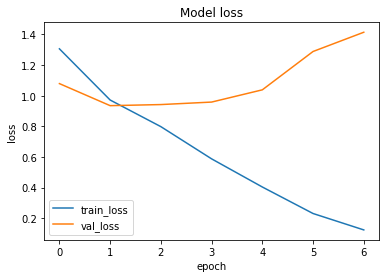

In [17]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(["train_loss","val_loss"])
plt.show()

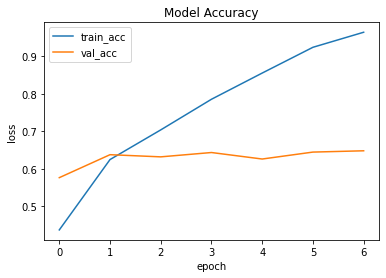

In [18]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(["train_acc","val_acc"])
plt.show()

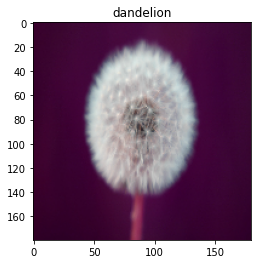

In [21]:
test_img = cv2.imread("dataset/dandelion/506660896_c903cca1f0.jpg")
test_img = cv2.resize(test_img,(CONFIG["IM_SIZE"],CONFIG["IM_SIZE"]),)

img_array = tf.keras.preprocessing.image.img_to_array(test_img)
img_array = tf.expand_dims(img_array, axis = 0)

prediction = model.predict(img_array)
label = CLASS_NAMES[np.argmax(prediction)]

plt.title(label)
plt.imshow(test_img)